In [1]:
#!/usr/bin/python

import sys
import os
import numpy as np
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append("../tools/")

In [2]:
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi" since it is the label
features_list = ['poi','salary', 'bonus',"to_messages","deferral_payments", "total_payments","loan_advances","restricted_stock_deferred","deferred_income","total_stock_value","from_poi_to_this_person","exercised_stock_options","from_messages","from_this_person_to_poi","long_term_incentive","shared_receipt_with_poi","restricted_stock","director_fees"] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "rb") as data_file:
    data_dict = pickle.load(data_file)

### Task 2: Remove outliers
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict



salary                        51
to_messages                   60
deferral_payments            107
total_payments                21
loan_advances                142
bonus                         64
email_address                 35
restricted_stock_deferred    128
deferred_income               97
total_stock_value             20
expenses                      51
from_poi_to_this_person       60
exercised_stock_options       44
from_messages                 60
other                         53
from_this_person_to_poi       60
poi                            0
long_term_incentive           80
shared_receipt_with_poi       60
restricted_stock              36
director_fees                129
dtype: int64
Empty DataFrame
Columns: [salary, bonus, long_term_incentive, deferred_income, deferral_payments, loan_advances, other, expenses, director_fees, total_payments]
Index: []
Empty DataFrame
Columns: [exercised_stock_options, restricted_stock, restricted_stock_deferred, total_stock_value]
Index: [

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
count,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144,144
mean,"185,446","1,239","222,801","2,149,476","582,812","675,997","-52,617","-194,395","3,017,427","36,356",39,"2,165,028",364,"293,788",25,"336,958",703,"905,016","9,712"
std,"197,042","2,238","753,841","8,779,364","6,794,472","1,233,155","273,183","605,842","6,271,528","45,990",74,"4,923,320","1,451","1,131,517",80,"687,183","1,077","2,000,357","30,423"
min,0,0,0,0,0,0,"-2,604,490","-3,504,386",0,0,0,0,0,0,0,0,0,0,0
25%,0,0,0,"87,472",0,0,0,"-39,072","256,376",0,0,0,0,0,0,0,0,"44,093",0
50%,"210,596",348,0,"913,825",0,"300,000",0,0,"980,534","21,937",4,"608,294",18,882,0,0,114,"361,978",0
75%,"269,668","1,623","8,536","1,885,158",0,"800,000",0,0,"2,372,703","54,234",41,"1,683,580",53,"148,577",14,"374,586",934,"857,103",0
max,"1,111,258","15,149","6,426,990","103,559,793","81,525,000","8,000,000",0,0,"49,110,078","228,763",528,"34,348,384","14,368","10,359,729",609,"5,145,434","5,521","14,761,694","125,034"


/Users/macbook/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


False    126
True      18
Name: poi, dtype: int64


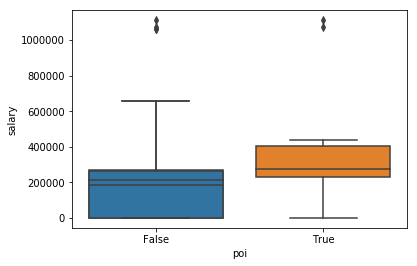

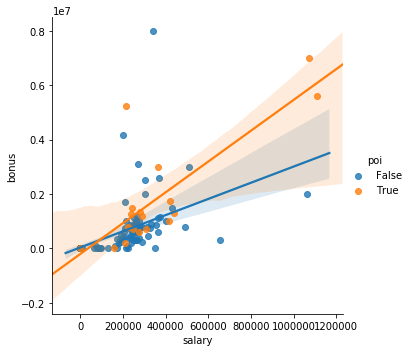

In [3]:
#Let's create a DataFrame to visualize data
df = pd.DataFrame.from_dict(my_dataset, orient='index', dtype=None)



#We transfom NaN to Null values (since NaN is a string)
df = df.replace("NaN", np.nan)

pd.options.display.float_format = '{:10,.0f}'.format
df.describe()

#How many mising values do we have
num_missing_values = df.isnull().sum()
print(num_missing_values)


#Fill missing values with 0
df = df.fillna(0)
df.head()

payment_categories = ['salary', 'bonus', 'long_term_incentive', 'deferred_income',
                      'deferral_payments', 'loan_advances', 'other', 'expenses', 'director_fees', 'total_payments']
stock_value_categories = ['exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred', 'total_stock_value']

# Look at the instances where the total we calculate is not equal to the total listed on the spreadsheet
df[df[payment_categories[:-1]].sum(axis='columns') != df['total_payments']][payment_categories]

df[df[stock_value_categories[:-1]].sum(axis='columns') != df['total_stock_value']][stock_value_categories]

#Some data has been shifted, let's order it

df.loc[('BELFER ROBERT','deferral_payments')] = 0
df.loc[('BELFER ROBERT','total_payments')] = 3285
df.loc[('BELFER ROBERT','restricted_stock_deferred')] = -44093
df.loc[('BELFER ROBERT','deferred_income')] = -102500
df.loc[('BELFER ROBERT','total_stock_value')] = 0
df.loc[('BELFER ROBERT','expenses')] = 3285
df.loc[('BELFER ROBERT','exercised_stock_options')] = 0
df.loc[('BELFER ROBERT','restricted_stock')] = 44093
df.loc[('BELFER ROBERT','director_fees')] = 102500

df.loc[('BHATNAGAR SANJAY','total_payments')] = 137864
df.loc[('BHATNAGAR SANJAY','restricted_stock_deferred')] = -2604490
df.loc[('BHATNAGAR SANJAY','total_stock_value')] = 15456290
df.loc[('BHATNAGAR SANJAY','expenses')] = 137864
df.loc[('BHATNAGAR SANJAY','exercised_stock_options')] = 15456290
df.loc[('BHATNAGAR SANJAY','other')] = 0
df.loc[('BHATNAGAR SANJAY','restricted_stock')] = 2604490
df.loc[('BHATNAGAR SANJAY','director_fees')] = 0

#Does that solve our problems ?
print(df[df[payment_categories[:-1]].sum(axis='columns') != df['total_payments']][payment_categories])
print(df[df[stock_value_categories[:-1]].sum(axis='columns') != df['total_stock_value']][stock_value_categories])


#Convert salary to float
df['salary'] = df['salary'].astype(float)

#droping rowS THAT WE DON'T NEED
df = df.drop("TOTAL")
df = df.drop("THE TRAVEL AGENCY IN THE PARK")

#The same for bonus
df['bonus'] = df['bonus'].astype(float)
#Description of the metrics
display(df.describe())
#Box plot of salary
display(sns.boxplot(y =df["salary"]))
#Box plot of Salary divided by POI
display(sns.boxplot(x="poi", y="salary", data=df))

#Simple linear Regression for bonus & salary
display(sns.lmplot(x="salary", y="bonus",hue="poi", data=df))

#How many POIs do we have ?
print(df["poi"].value_counts())

#If we want to use the cleaned data in other projects we can save it in a csv
clean_enron= "clean_enron_df_csv"
dirpath = os.getcwd()
df.to_csv(dirpath+clean_enron,index_label="name")

my_dataset = df.to_dict(orient="index")

### Extract features and labels from dataset for local testing
### We transform from dictionary to list ready for sklearn
data = featureFormat(my_dataset, features_list, sort_keys = True)

### We split the labels and features
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

#This allows to scale features, substracting the mean from each feature and then scaling it to unit cariance
from sklearn.preprocessing import StandardScaler
#Pipeline allows to do a sequence of different transformations in just one line
from sklearn.pipeline import Pipeline
#from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import decomposition
#We will use Grid Search to automatically tune the parameters of our model 

from sklearn.model_selection import GridSearchCV

#Let's separate the data in test and 
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42,stratify=labels)

In [4]:
#First we will scale the data, then apply PCA to reduce dimensionality and then our classifier
pipe = Pipeline([
        ('scale', StandardScaler()),
        ('reduce_dims', PCA(n_components=4)),
        ('clf', SVC(kernel = 'linear', C = 1))])

param_grid = dict(reduce_dims__n_components=[4,6,8],
                  clf__C=np.logspace(-4, 1, 6),
                  clf__kernel=['rbf','linear'])


grid = GridSearchCV(pipe,param_grid=param_grid,cv=3, n_jobs=1, verbose=2, scoring="accuracy")

In [15]:
grid.fit(features_train, labels_train)

print("\n Best score %0.3f" % grid.best_score_)

print("\n Best parameters = ")
best_parameters = grid.best_estimator_.get_params()
for param_name in sorted(param_grid.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

grid.best_estimator_.score(features_train, labels_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] clf__C=0.0001, clf__kernel=rbf, reduce_dims__n_components=4 .....
[CV]  clf__C=0.0001, clf__kernel=rbf, reduce_dims__n_components=4, total=   0.0s
[CV] clf__C=0.0001, clf__kernel=rbf, reduce_dims__n_components=4 .....
[CV]  clf__C=0.0001, clf__kernel=rbf, reduce_dims__n_components=4, total=   0.0s
[CV] clf__C=0.0001, clf__kernel=rbf, reduce_dims__n_components=4 .....
[CV]  clf__C=0.0001, clf__kernel=rbf, reduce_dims__n_components=4, total=   0.0s
[CV] clf__C=0.0001, clf__kernel=rbf, reduce_dims__n_components=6 .....
[CV]  clf__C=0.0001, clf__kernel=rbf, reduce_dims__n_components=6, total=   0.0s
[CV] clf__C=0.0001, clf__kernel=rbf, reduce_dims__n_components=6 .....
[CV]  clf__C=0.0001, clf__kernel=rbf, reduce_dims__n_components=6, total=   0.0s
[CV] clf__C=0.0001, clf__kernel=rbf, reduce_dims__n_components=6 .....
[CV]  clf__C=0.0001, clf__kernel=rbf, reduce_dims__n_components=6, total=   0.0s
[CV] clf__C=0.0001, clf__k

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled fea

[CV]  clf__C=0.001, clf__kernel=linear, reduce_dims__n_components=8, total=   0.0s
[CV] clf__C=0.001, clf__kernel=linear, reduce_dims__n_components=8 ...
[CV]  clf__C=0.001, clf__kernel=linear, reduce_dims__n_components=8, total=   0.0s
[CV] clf__C=0.001, clf__kernel=linear, reduce_dims__n_components=8 ...
[CV]  clf__C=0.001, clf__kernel=linear, reduce_dims__n_components=8, total=   0.0s
[CV] clf__C=0.01, clf__kernel=rbf, reduce_dims__n_components=4 .......
[CV]  clf__C=0.01, clf__kernel=rbf, reduce_dims__n_components=4, total=   0.0s
[CV] clf__C=0.01, clf__kernel=rbf, reduce_dims__n_components=4 .......
[CV]  clf__C=0.01, clf__kernel=rbf, reduce_dims__n_components=4, total=   0.0s
[CV] clf__C=0.01, clf__kernel=rbf, reduce_dims__n_components=4 .......
[CV]  clf__C=0.01, clf__kernel=rbf, reduce_dims__n_components=4, total=   0.0s
[CV] clf__C=0.01, clf__kernel=rbf, reduce_dims__n_components=6 .......
[CV]  clf__C=0.01, clf__kernel=rbf, reduce_dims__n_components=6, total=   0.0s
[CV] clf_

/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/macbook/anaconda3/lib/python3.7/site-packa

[CV]  clf__C=0.1, clf__kernel=linear, reduce_dims__n_components=8, total=   0.0s
[CV] clf__C=0.1, clf__kernel=linear, reduce_dims__n_components=8 .....
[CV]  clf__C=0.1, clf__kernel=linear, reduce_dims__n_components=8, total=   0.0s
[CV] clf__C=0.1, clf__kernel=linear, reduce_dims__n_components=8 .....
[CV]  clf__C=0.1, clf__kernel=linear, reduce_dims__n_components=8, total=   0.0s
[CV] clf__C=1.0, clf__kernel=rbf, reduce_dims__n_components=4 ........
[CV]  clf__C=1.0, clf__kernel=rbf, reduce_dims__n_components=4, total=   0.0s
[CV] clf__C=1.0, clf__kernel=rbf, reduce_dims__n_components=4 ........
[CV]  clf__C=1.0, clf__kernel=rbf, reduce_dims__n_components=4, total=   0.0s
[CV] clf__C=1.0, clf__kernel=rbf, reduce_dims__n_components=4 ........
[CV]  clf__C=1.0, clf__kernel=rbf, reduce_dims__n_components=4, total=   0.0s
[CV] clf__C=1.0, clf__kernel=rbf, reduce_dims__n_components=6 ........
[CV]  clf__C=1.0, clf__kernel=rbf, reduce_dims__n_components=6, total=   0.0s
[CV] clf__C=1.0, cl

/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/macbook/anaconda3/lib/python3.7/site-packa

[CV]  clf__C=10.0, clf__kernel=linear, reduce_dims__n_components=4, total=   0.0s
[CV] clf__C=10.0, clf__kernel=linear, reduce_dims__n_components=6 ....
[CV]  clf__C=10.0, clf__kernel=linear, reduce_dims__n_components=6, total=   0.0s
[CV] clf__C=10.0, clf__kernel=linear, reduce_dims__n_components=6 ....
[CV]  clf__C=10.0, clf__kernel=linear, reduce_dims__n_components=6, total=   0.0s
[CV] clf__C=10.0, clf__kernel=linear, reduce_dims__n_components=6 ....
[CV]  clf__C=10.0, clf__kernel=linear, reduce_dims__n_components=6, total=   0.0s
[CV] clf__C=10.0, clf__kernel=linear, reduce_dims__n_components=8 ....
[CV]  clf__C=10.0, clf__kernel=linear, reduce_dims__n_components=8, total=   0.0s
[CV] clf__C=10.0, clf__kernel=linear, reduce_dims__n_components=8 ....
[CV]  clf__C=10.0, clf__kernel=linear, reduce_dims__n_components=8, total=   0.0s
[CV] clf__C=10.0, clf__kernel=linear, reduce_dims__n_components=8 ....
[CV]  clf__C=10.0, clf__kernel=linear, reduce_dims__n_components=8, total=   0.0s


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:    0.7s finished
/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.87

In [ ]:
#lo de arriba te dará los parametros que debes usar. Looks good!

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(labels_test,preds)))
print('Precision Score : ' + str(precision_score(labels_test,preds)))
print('Recall Score : ' + str(recall_score(labels_test,preds)))
print('F1 Score : ' + str(f1_score(labels_test,preds)))

#Dummy Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(labels_test,preds)))

In [ ]:
#el modelo que has usado no predice ningún POI
#Preguntas:
#Qué pasa si uso grid para tunear parámetros? fácil de hacerlo
#Qué pasa si cambio de modelo?
#Qué ocurriría si uso scaling & PCA en modelos donde no hace falta scaling ?

## esto es PCA de udacity

n_components = 400

print "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
t0 = time()
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)
print "done in %0.3fs" % (time() - t0)

eigenfaces = pca.components_.reshape((n_components, h, w))

print "Projecting the input data on the eigenfaces orthonormal basis"
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
#With the commands below we extract the variance for the first and second components
print "Variance explained by principal component"
print "Component 1", pca.explained_variance_ratio_[0]
print "Component 2", pca.explained_variance_ratio_[1]
print "done in %0.3fs" % (time() - t0)

parameteres = {'SVM__C':[0.001,0.1,10,100,10e5], 'SVM__gamma':[0.1,0.01]}



#estás intentando saber cómo usar pipe, mira el articulo de towardsdatascience que pone un ejemplo de como usar pipe

# Provided to give you a starting point. Try a variety of classifiers.

clf = 

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html




### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)